In [1]:
# inputs
m = 1.1
pbase = 100
pgps = 40
pmod = 35
pcam = 20
pbat = 15
cost_inv = 90


In [5]:
# creating the function for net profit
def net_profit (m = 1.1,
                pbase = 100,
                pgps = 40,
                pmod = 35,
                pcam = 20,
                pbat = 15,
                cost_inv = 90):
  # revenue calculation
  gross_profit = pbase + m*((pgps+pmod+pcam+pbat)**0.5)
  # net profit calculation
  net_profit = gross_profit - cost_inv
  return net_profit



In [6]:
net_profit()

21.536897329871664

In [8]:
# create simulations for all variables to account for uncertainty
import numpy as np
num_sim = 10000
sim_m = np.random.normal(1.1,0.1,num_sim)
sim_pbase = np.random.normal(100,10,num_sim)
sim_pgps = np.random.normal(40,8,num_sim)
sim_pmod = np.random.normal(35,20,num_sim)
sim_pcam = np.random.normal(20,7,num_sim)
sim_pbat = np.random.normal(15,8,num_sim)
sim_cost_inc = np.random.normal(90,10,num_sim)

In [11]:
# implementing simulation into the function
sim_net_profit = [net_profit(sim_m[i],sim_pbase[i],sim_pgps[i],sim_pmod[i],sim_pcam[i],sim_pbat[i],sim_cost_inc[i])for i in range(num_sim)]
print(sim_net_profit)

[54.017969784610315, 39.818122412295565, 19.0424516690629, 13.743465458912723, 27.209418187148728, 38.38732994487829, 36.34835832522293, 50.04609391288818, 26.559702649710246, 14.149343604176863, 30.93778001629279, 33.120204577426634, 12.308407226701618, 5.223037634304092, 32.08656679641578, 53.470154762765446, 24.793279967552095, 32.071933174214735, 15.465143747030297, 10.618865189300863, 9.80797963522916, 27.98991236960262, 22.69870054354584, 24.264416668701458, 6.093598497084116, 38.744687558916326, 6.544469895391714, 39.0383767457261, 37.227580755449935, 17.35961676677357, 7.120137312860621, 26.994916423659333, 28.461159083370887, 17.191088239336565, 0.8850597514352074, -12.463179618929402, 29.41069888499287, 18.935912737213357, 7.496926047842379, 31.694413821828874, 33.559874243316315, 13.765053327839922, 19.31230268059342, 27.497420527724472, 32.945972933031996, 12.11051050416259, 16.93881937527756, 7.198010188477056, 28.935131932366446, 18.193417744574234, 3.420505882106937, 29.

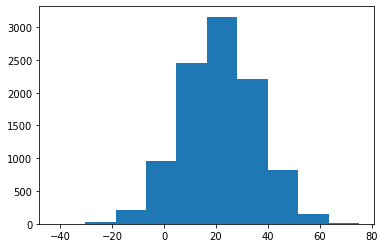

In [13]:
# showing histogram for all net profit simulations
import matplotlib.pyplot as plt

plt.hist(sim_net_profit)
plt.show()

In [17]:
# probability of net prodit being negative
neg_profit = [sim_net_profit[i]<0 for i in range(num_sim)]
print(np.average(neg_profit))

0.0664


In [23]:
# create dataframe to start linear regression
import pandas as pd
data = pd.DataFrame(zip(sim_m,sim_pbase,sim_pgps,sim_pmod,sim_pcam,sim_pbat,sim_cost_inc, sim_net_profit),
                    columns = ['sim_m','sim_pbase','sim_pgps','sim_pmod','sim_pcam','sim_pbat','sim_cost_inc','sim_net_profit'])
data

,sim_m,sim_pbase,sim_pgps,sim_pmod,sim_pcam,sim_pbat,sim_cost_inc,sim_net_profit
0,1.064513,118.666050,37.892579,9.004878,19.982363,3.351039,73.569114,54.017970
1,1.144010,101.563806,33.961038,36.995995,6.728236,18.332556,72.955691,39.818122
2,1.043213,95.753030,46.675100,48.811950,20.606062,9.438109,88.398815,19.042452
3,0.954312,88.174727,44.894734,54.712392,23.009158,24.475467,86.005292,13.743465
4,1.037437,91.934566,65.573853,45.711390,17.217907,26.302836,77.633043,27.209418
...,...,...,...,...,...,...,...,...
9995,1.134047,95.914757,51.382122,44.959991,20.864722,17.590892,86.448563,22.632753
9996,1.277281,106.127036,44.589704,13.640460,25.486319,21.349650,90.446716,28.772678
9997,1.004213,111.722559,42.716866,12.399779,28.566259,10.782162,94.139550,27.343275
9998,1.399519,102.983868,41.573434,48.154549,18.851500,33.483792,91.332616,28.332165


In [28]:
#  putting the variables into x and y
import statsmodels.api as sm
x = sm.add_constant(data[['sim_m','sim_pbase','sim_pgps','sim_pmod','sim_pcam','sim_pbat','sim_cost_inc']])
y = data['sim_net_profit']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# creating the linear model and showing a summary
mod = sm.OLS(y,x,hasconstant = True)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sim_net_profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.030e+07
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:54:34   Log-Likelihood:                 3637.8
No. Observations:               10000   AIC:                            -7260.
Df Residuals:                    9992   BIC:                            -7202.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.8746      0.031   -188.492      0.000      -5.936      -5.814
sim_m           10.4133      0.017    618.332      0.000      10.380      10.446
sim_pbase        0.9999      0.000   5901.232      0.000       1.000       1.000
sim_pgps         0.0534      0.000    253.202      0.000       0.053       0.054
sim_pmod         0.0536   8.35e-05    642.845      0.000       0.053       0.054
sim_pcam         0.0537      0.000    222.163      0.000       0.053       0.054
sim_pbat         0.0537      0.000    255.905      0.000       0.053       0.054
sim_cost_inc    -1.0000      0.000  -5943.865      0.000      -1.000      -1.000
==============================================================================
Omnibus:                     9197.899   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1059650.730
Skew:                          -4.015   Prob(JB):                         0.00
Kurtosis:                      52.786   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# look at coefficients
result.params * x.std()

const           -0.000000
sim_m            1.040662
sim_pbase        9.932372
sim_pgps         0.426176
sim_pmod         1.081693
sim_pcam         0.373829
sim_pbat         0.430695
sim_cost_inc   -10.003357
dtype: float64

If Pbat is one standard deviation above the baseline, the variable will increase by 0.38 or $380,000. This will also be shown in the formula as net profit will increase when Pbat increases. There is a positive relationship between Pbat and the outcome variable of net profit.